 ## USA, Great Britain and Canada, womens teams have already qualified for olympics?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


code to predict who will be on womens olympic team

```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load a hypothetical dataset with athlete information and past performance
# You would need to replace this with real data
data = pd.read_csv('olympic_data.csv')

# Assume you have features like 'Age', 'PastCompetitionResults', etc.
X = data[['Age', 'PastCompetitionResults']]

# Assume 'IsOnOlympicTeam' is the target variable (1 if on the team, 0 if not)
y = data['IsOnOlympicTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a basic predictive model (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now, you can use this model to predict which athletes might be on the Olympic team for the USA
# Replace X_test with the features of athletes you want to predict
predicted_team = model.predict(X_test)

# Print the predicted team members
print("Predicted Olympic Team:")
print(data.loc[X_test.index[predicted_team == 1]])
```

### features like 'Age', 'PastCompetitionResults', etc.


### 'IsOnOlympicTeam' is the target variable (1 if on the team, 0 if not)


In [2]:
df = pd.read_csv('../Cleaning/cleaned22to23women_September.csv')

In [3]:
df

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,Jana ABDELSALAM,EGY,FIG Apparatus World Cup 2023,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533
1,Jana ABDELSALAM,EGY,FIG Apparatus World Cup 2023,final,"Cairo, Egypt",BB,8.0,4.8,6.566,0.0,11.366
2,Jana ABDELSALAM,EGY,FIG Apparatus World Cup 2023,qual,"Cairo, Egypt",BB,9.0,4.7,7.466,0.0,12.166
3,Jana ABDELSALAM,EGY,FIG Apparatus World Cup 2023,final,"Doha, Qatar",BB,4.0,5.0,8.000,0.0,13.000
4,Jana ABDELSALAM,EGY,FIG Apparatus World Cup 2023,qual,"Doha, Qatar",BB,6.0,5.0,7.933,0.0,12.933
...,...,...,...,...,...,...,...,...,...,...,...
3508,Christina Zwicker,CRO,2023 Osijek Challenge Cup,final,"Osijek, Croatia.",BB,5.0,4.7,7.966,0.0,12.666
3509,Christina Zwicker,CRO,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",BB,3.0,4.6,8.100,0.0,12.700
3510,Christina Zwicker,CRO,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",UB,19.0,4.5,6.633,0.0,11.133
3511,Christina Zwicker,CRO,2023 Tel Aviv Challenge Cup,qual,"Tel Aviv, Israel",BB,11.0,4.5,7.333,0.0,11.833


In [4]:
df["Name"] = df["Name"].str.lower()

In [5]:
df

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,jana abdelsalam,EGY,FIG Apparatus World Cup 2023,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533
1,jana abdelsalam,EGY,FIG Apparatus World Cup 2023,final,"Cairo, Egypt",BB,8.0,4.8,6.566,0.0,11.366
2,jana abdelsalam,EGY,FIG Apparatus World Cup 2023,qual,"Cairo, Egypt",BB,9.0,4.7,7.466,0.0,12.166
3,jana abdelsalam,EGY,FIG Apparatus World Cup 2023,final,"Doha, Qatar",BB,4.0,5.0,8.000,0.0,13.000
4,jana abdelsalam,EGY,FIG Apparatus World Cup 2023,qual,"Doha, Qatar",BB,6.0,5.0,7.933,0.0,12.933
...,...,...,...,...,...,...,...,...,...,...,...
3508,christina zwicker,CRO,2023 Osijek Challenge Cup,final,"Osijek, Croatia.",BB,5.0,4.7,7.966,0.0,12.666
3509,christina zwicker,CRO,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",BB,3.0,4.6,8.100,0.0,12.700
3510,christina zwicker,CRO,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",UB,19.0,4.5,6.633,0.0,11.133
3511,christina zwicker,CRO,2023 Tel Aviv Challenge Cup,qual,"Tel Aviv, Israel",BB,11.0,4.5,7.333,0.0,11.833


In [6]:
# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = df.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])



In [7]:
# Create a dictionary to store the top 5 performers on each apparatus
top5_by_apparatus = {}

In [8]:
# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_by_apparatus[apparatus] = df_sorted[df_sorted['Apparatus'] == apparatus].head(10)


In [9]:
# Concatenate the top 5 performers on each apparatus into a single DataFrame
top5_overall = pd.concat(top5_by_apparatus.values())


In [10]:
# Create a DataFrame to store the top 5 performers for each apparatus
top5_by_apparatus = []

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]
    
    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()
    
    top5_for_apparatus = []
    
    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])
    
    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)
    
    # Append the top 5 performers for this apparatus to the list
    top5_by_apparatus.append(top5_for_apparatus_df)

# Display the top 5 performers for each apparatus
for apparatus, top5 in zip(apparatus_names, top5_by_apparatus):
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score']])
    print("\n")


Top 5 on BB:
                  Name Country   Score
2179         yushan ou     CHN  14.360
2137      mana okamura     JPN  14.133
1367    alice kinsella     GBR  14.100
126     urara ashikawa     JPN  14.066
1657          huan luo     CHN  14.033
3235     giorgia villa     ITA  13.966
1014    georgia godwin     AUS  13.900
251       marine boyer     FRA  13.866
1413     zsofia kovacs     HUN  13.833
24    ondine achampong     GBR  13.800


Top 5 on FX:
                       Name Country   Score
884        jessica gadirova     GBR  14.600
2469      joscelyn roberson     USA  14.150
871       jennifer gadirova     GBR  13.950
1688         martina maggio     ITA  13.933
1368         alice kinsella     GBR  13.900
70          angela andreoli     ITA  13.866
2181              yushan ou     CHN  13.860
1016         georgia godwin     AUS  13.833
2778   poppy grace stickler     GBR  13.750
1744  sabrina maneca voinea     ROU  13.700


Top 5 on UB:
                    Name Country   Score
191

In [11]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                  Name Country   Score  Rank  D_Score  E_Score  Penalty
2179         yushan ou     CHN  14.360   1.0      6.2    8.166      0.0
2137      mana okamura     JPN  14.133   1.0      5.7    8.433      0.0
1367    alice kinsella     GBR  14.100   1.0      5.9    8.200      0.0
126     urara ashikawa     JPN  14.066   2.0      5.8    8.266      0.0
1657          huan luo     CHN  14.033   2.0      5.9    8.133      0.0
3235     giorgia villa     ITA  13.966   1.0      5.4    8.566      0.0
1014    georgia godwin     AUS  13.900   1.0      5.9    8.000      0.0
251       marine boyer     FRA  13.866   2.0      5.8    8.066      0.0
1413     zsofia kovacs     HUN  13.833   1.0      5.9    7.933      0.0
24    ondine achampong     GBR  13.800   1.0      5.7    8.100      0.0


Top 5 on FX:
                       Name Country   Score  Rank  D_Score  E_Score  Penalty
884        jessica gadirova     GBR  14.600   1.0      5.8    8.800      0.0
2469      joscelyn roberso

In [12]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Accessing the top 5 performers for a specific apparatus (e.g., 'HB'):
top5_for_BB = top5_by_apparatus_dict['BB']

# Accessing the top 5 performers for another apparatus (e.g., 'PH'):
top5_for_VT = top5_by_apparatus_dict['VT']

top5_for_FX = top5_by_apparatus_dict['FX']

top5_for_UB = top5_by_apparatus_dict['UB']


In [13]:
top5_for_BB

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
2179,yushan ou,CHN,2023 FISU World University Games,final,"Chengdu, China",BB,1.0,6.2,8.166,0.0,14.360
2137,mana okamura,JPN,FIG Apparatus World Cup 2023,final,"Cottbus, Germany",BB,1.0,5.7,8.433,0.0,14.133
1367,alice kinsella,GBR,2023 British Gymnastics Championships,qual,"Liverpool, England",BB,1.0,5.9,8.200,0.0,14.100
126,urara ashikawa,JPN,FIG Apparatus World Cup 2023,final,"Cottbus, Germany",BB,2.0,5.8,8.266,0.0,14.066
1657,huan luo,CHN,2023 FISH World University Games,AAfinal,"Chengdu, China",BB,2.0,5.9,8.133,0.0,14.033
3235,giorgia villa,ITA,FIG Apparatus World Cup 2023,final,"Baku, Azerbaijan",BB,1.0,5.4,8.566,0.0,13.966
1014,georgia godwin,AUS,2023 Osijek Challenge Cup,final,"Osijek, Croatia.",BB,1.0,5.9,8.000,0.0,13.900
251,marine boyer,FRA,FIG Apparatus World Cup 2023,final,"Baku, Azerbaijan",BB,2.0,5.8,8.066,0.0,13.866
1413,zsofia kovacs,HUN,2023 Senior European Championships,AAfinal,"Antalya, Turkey",BB,1.0,5.9,7.933,0.0,13.833
24,ondine achampong,GBR,2023 British Gymnastics Championships,final,"Liverpool, England",BB,1.0,5.7,8.100,0.0,13.800


In [14]:
top5_for_BB["Country"].value_counts()

Country
CHN    2
JPN    2
GBR    2
ITA    1
AUS    1
FRA    1
HUN    1
Name: count, dtype: int64

In [15]:
bb_countries = top5_for_BB["Country"].value_counts()

In [16]:
top5_for_VT

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
568,coline devillard,FRA,FIG Apparatus World Cup 2023,final,"Doha, Qatar",VT,1.0,5.4,9.000,0.0,14.400
2018,alexa moreno,MEX,2023 Central American and Caribbean Games,qual,"San Salvador, El Salvador",VT,1.0,5.4,8.950,0.0,14.350
831,aline friess,FRA,2022 Senior European Championships,qual,"Munich, Germany",VT,1.0,5.4,8.933,0.0,14.333
3148,lisa vaelen,BEL,2023 Senior European Championships,AAfinal,"Antalya, Turkey",VT,1.0,5.4,8.933,0.0,14.333
3315,sarah voss,GER,2022 Senior European Championships,TeamFinal,"Munich, Germany",VT,1.0,5.0,9.333,0.0,14.333
1410,zsofia kovacs,HUN,2022 Senior European Championships,TeamFinal,"Munich, Germany",VT,2.0,5.0,9.266,0.0,14.266
15,ondine achampong,GBR,2022 British Gymnastics Championships,qual,"Liverpool, England",VT,1.0,5.0,9.250,0.0,14.250
2471,joscelyn roberson,USA,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",VT,1.0,5.2,9.033,0.0,14.233
914,jessica gadirova,GBR,2023 Senior European Championships,qual,"Antalya, Turkey",VT,2.0,5.0,9.200,0.0,14.200
518,asia d amato,ITA,FIG Apparatus World Cup 2023,qual,"Cairo, Egypt",VT,1.0,5.0,9.133,0.0,14.133


In [17]:
vt_countries = top5_for_VT["Country"].value_counts()

In [18]:
top5_for_FX

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
884,jessica gadirova,GBR,2022 British Gymnastics Championships,final,"Liverpool, England",FX,1.0,5.8,8.800,0.0,14.600
2469,joscelyn roberson,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,1.0,6.2,7.950,0.0,14.150
871,jennifer gadirova,GBR,2022 British Gymnastics Championships,final,"Liverpool, England",FX,2.0,5.3,8.650,0.0,13.950
1688,martina maggio,ITA,2022 Senior European Championships,final,"Munich, Germany",FX,2.0,5.7,8.233,0.0,13.933
1368,alice kinsella,GBR,2023 British Gymnastics Championships,final,"Liverpool, England",FX,1.0,5.5,8.400,0.0,13.900
70,angela andreoli,ITA,2022 Senior European Championships,final,"Munich, Germany",FX,3.0,5.8,8.066,0.0,13.866
2181,yushan ou,CHN,2023 FISU World University Games,final,"Chengdu, China",FX,1.0,5.8,8.066,0.0,13.860
1016,georgia godwin,AUS,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",FX,1.0,5.7,8.133,0.0,13.833
2778,poppy grace stickler,GBR,2023 British Gymnastics Championships,final,"Liverpool, England",FX,2.0,5.5,8.250,0.0,13.750
1744,sabrina maneca voinea,ROU,2023 Senior European Championships,qual,"Antalya, Turkey",FX,2.0,6.0,7.700,0.0,13.700


## Joscelyn Roberson USA number 2 in Floor

In [19]:
fx_countries = top5_for_FX["Country"].value_counts()

In [20]:
top5_for_UB

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
1912,zoe miller,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,1.0,6.4,8.450,0.0,14.850
2401,qiyuan qiu,CHN,FIG Apparatus World Cup 2023,qual,"Baku, Azerbaijan",UB,1.0,6.2,8.566,0.0,14.766
478,alice d amato,ITA,2022 Senior European Championships,TeamFinal,"Munich, Germany",UB,1.0,6.2,8.433,0.0,14.633
3262,naomi visser,NED,2023 Senior European Championships,qual,"Antalya, Turkey",UB,2.0,6.1,8.366,0.0,14.466
2657,elisabeth seitz,GER,2022 Senior European Championships,final,"Munich, Germany",UB,1.0,6.1,8.333,0.0,14.433
629,rebecca downie,GBR,2023 Senior European Championships,qual,"Antalya, Turkey",UB,4.0,6.3,8.066,0.0,14.366
638,siyu du,CHN,2023 FISU World University Games,qual,"Chengdu, China",UB,1.0,6.2,8.166,0.0,14.366
782,georgia mae fenton,GBR,2023 British Gymnastics Championships,final,"Liverpool, England",UB,2.0,6.0,8.300,0.0,14.300
1425,zsofia kovacs,HUN,2023 Varna World Challenge Cup Results,qual,"Varna, Bulgaria",UB,1.0,5.8,8.500,0.0,14.300
1370,alice kinsella,GBR,2023 British Gymnastics Championships,final,"Liverpool, England",UB,3.0,6.0,8.250,0.0,14.250


## Zoe Miller USA Number 1 in Floor

In [21]:
ub_countries = top5_for_UB["Country"].value_counts()

In [22]:
ub_countries

Country
GBR    3
CHN    2
USA    1
ITA    1
NED    1
GER    1
HUN    1
Name: count, dtype: int64

In [23]:
# Concatenate the DataFrames
combined_df = pd.concat([ub_countries, vt_countries, bb_countries, fx_countries])

# Group by 'Country' and sum the counts
result = combined_df.groupby('Country').sum().reset_index()

result = result.sort_values(by='count', ascending=False)

print(result)


   Country  count
4      GBR     11
2      CHN      5
7      ITA      5
3      FRA      3
6      HUN      3
12     USA      3
0      AUS      2
5      GER      2
8      JPN      2
1      BEL      1
9      MEX      1
10     NED      1
11     ROU      1


In [24]:
result

,Country,count
4,GBR,11
2,CHN,5
7,ITA,5
3,FRA,3
6,HUN,3
12,USA,3
0,AUS,2
5,GER,2
8,JPN,2
1,BEL,1


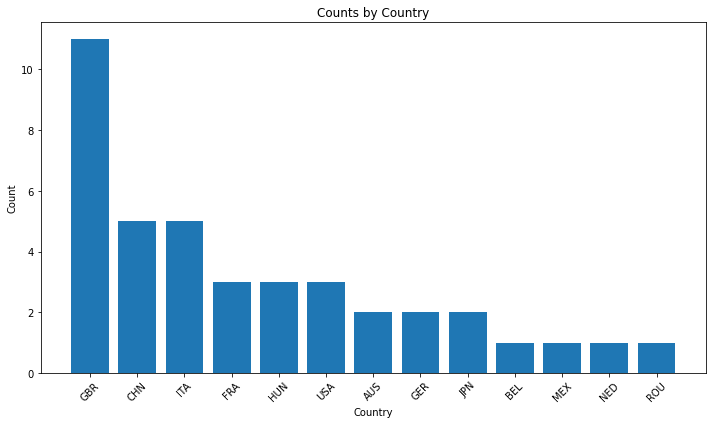

In [25]:
# Create a bar graph
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.bar(result['Country'], result['count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts by Country')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()  # Optional: Ensure all labels fit in the figure

# Show the plot
plt.show()

---

## USA top 5

In [26]:
usa = df[df["Country"] == "USA"]

In [27]:
# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = usa.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])



In [28]:
# Create a DataFrame to store the top 5 performers for each apparatus
top5_by_apparatus = []

# Iterate over unique apparatus names
apparatus_names = usa['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]
    
    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()
    
    top5_for_apparatus = []
    
    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])
    
    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)
    
    
    # Append the top 5 performers for this apparatus to the list
    top5_by_apparatus.append(top5_for_apparatus_df)

# Display the top 5 performers for each apparatus
for apparatus, top5 in zip(apparatus_names, top5_by_apparatus):
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score']])
    print("\n")


Top 5 on BB:
                   Name Country   Score
2810    ashlee sullivan     USA  13.800
2475  joscelyn roberson     USA  13.233
1807      nola matthews     USA  13.200
1909         zoe miller     USA  12.900


Top 5 on FX:
                   Name Country  Score
2469  joscelyn roberson     USA  14.15
1808      nola matthews     USA  12.90
2811    ashlee sullivan     USA  12.65
1910         zoe miller     USA  10.85


Top 5 on UB:
                   Name Country  Score
1912         zoe miller     USA  14.85
1809      nola matthews     USA  13.65
2470  joscelyn roberson     USA  13.00
2812    ashlee sullivan     USA  12.55


Top 5 on VT:
                   Name Country   Score
2471  joscelyn roberson     USA  14.233
1913         zoe miller     USA  13.900
1810      nola matthews     USA  13.100
2813    ashlee sullivan     USA  13.100




In [29]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                   Name Country   Score  Rank  D_Score  E_Score  Penalty
2810    ashlee sullivan     USA  13.800   1.0      5.8    8.000      0.0
2475  joscelyn roberson     USA  13.233   2.0      5.8    7.433      0.0
1807      nola matthews     USA  13.200   4.0      5.2    8.000      0.0
1909         zoe miller     USA  12.900  10.0      5.2    7.700      0.0


Top 5 on FX:
                   Name Country  Score  Rank  D_Score  E_Score  Penalty
2469  joscelyn roberson     USA  14.15   1.0      6.2     7.95      0.0
1808      nola matthews     USA  12.90   5.0      5.2     7.80      0.1
2811    ashlee sullivan     USA  12.65  13.0      5.7     6.95      0.0
1910         zoe miller     USA  10.85  38.0      5.0     6.25      0.4


Top 5 on UB:
                   Name Country  Score  Rank  D_Score  E_Score  Penalty
1912         zoe miller     USA  14.85   1.0      6.4     8.45      0.0
1809      nola matthews     USA  13.65   7.0      5.6     8.05      0.0
2470  joscelyn r

In [30]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Accessing the top 5 performers for a specific apparatus (e.g., 'HB'):
top5_for_BB = top5_by_apparatus_dict['BB']

# Accessing the top 5 performers for another apparatus (e.g., 'PH'):
top5_for_VT = top5_by_apparatus_dict['VT']

top5_for_FX = top5_by_apparatus_dict['FX']

top5_for_UB = top5_by_apparatus_dict['UB']


In [31]:
top5_for_BB

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
2810,ashlee sullivan,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",BB,1.0,5.8,8.000,0.0,13.800
2475,joscelyn roberson,USA,FIG Apparatus World Cup 2023,final,"Cairo, Egypt",BB,2.0,5.8,7.433,0.0,13.233
1807,nola matthews,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",BB,4.0,5.2,8.000,0.0,13.200
1909,zoe miller,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",BB,10.0,5.2,7.700,0.0,12.900


In [32]:
top5_for_VT

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
2471,joscelyn roberson,USA,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",VT,1.0,5.2,9.033,0.0,14.233
1913,zoe miller,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT,4.0,4.6,9.300,0.0,13.900
1810,nola matthews,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT,15.0,4.2,8.900,0.0,13.100
2813,ashlee sullivan,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT,15.0,5.0,8.400,0.3,13.100


In [33]:
top5_for_FX

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
2469,joscelyn roberson,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,1.0,6.2,7.95,0.0,14.15
1808,nola matthews,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,5.0,5.2,7.80,0.1,12.90
2811,ashlee sullivan,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,13.0,5.7,6.95,0.0,12.65
1910,zoe miller,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,38.0,5.0,6.25,0.4,10.85


In [34]:
top5_for_UB

,Name,Country,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
1912,zoe miller,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,1.0,6.4,8.45,0.0,14.85
1809,nola matthews,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,7.0,5.6,8.05,0.0,13.65
2470,joscelyn roberson,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,14.0,5.3,7.70,0.0,13.00
2812,ashlee sullivan,USA,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,19.0,5.3,7.25,0.0,12.55


---

## UK top 5

In [35]:
gbr = df[df["Country"] == "GBR"]

# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = gbr.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                    Name Country  Score  Rank  D_Score  E_Score  Penalty
1367      alice kinsella     GBR  14.10   1.0      5.9     8.20      0.0
24      ondine achampong     GBR  13.80   1.0      5.7     8.10      0.0
869    jennifer gadirova     GBR  13.75   1.0      5.9     7.85      0.0
901     jessica gadirova     GBR  13.65   2.0      5.0     8.65      0.0
768   georgia mae fenton     GBR  13.35   3.0      5.5     7.85      0.0


Top 5 on FX:
                      Name Country  Score  Rank  D_Score  E_Score  Penalty
884       jessica gadirova     GBR  14.60   1.0      5.8     8.80      0.0
871      jennifer gadirova     GBR  13.95   2.0      5.3     8.65      0.0
1368        alice kinsella     GBR  13.90   1.0      5.5     8.40      0.0
2778  poppy grace stickler     GBR  13.75   2.0      5.5     8.25      0.0
747              ruby evan     GBR  13.50   2.0      5.4     8.10      0.0


Top 5 on UB:
                    Name Country   Score  Rank  D_Score  E_Score  Pen

## Canada top 5

In [36]:
can = df[df["Country"] == "CAN"]

# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = can.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
1043  maddison hajjar     CAN  12.550  15.0      4.8    7.750      0.0
3092    sydney turner     CAN  12.450  20.0      5.4    7.050      0.0
610   jessica dowling     CAN  12.066  14.0      4.5    7.566      0.0
3016     aurelie tran     CAN  11.800  30.0      5.3    6.500      0.0
3496   evandra zlobec     CAN  11.200  38.0      4.5    6.700      0.0


Top 5 on FX:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
1040  maddison hajjar     CAN  12.833   2.0      4.7    8.133      0.0
3017     aurelie tran     CAN  12.833   3.0      4.6    8.233      0.0
3497   evandra zlobec     CAN  12.650  11.0      4.9    7.750      0.0
3093    sydney turner     CAN  12.250  17.0      4.6    7.650      0.0
616   jessica dowling     CAN  12.133   9.0      4.9    7.533      0.3


Top 5 on UB:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
2768      ava stewart     CAN  13.

---

## China top 5

In [37]:
chn = df[df["Country"] == "CHN"]

# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = chn.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
              Name Country   Score  Rank  D_Score  E_Score  Penalty
2179     yushan ou     CHN  14.360   1.0      6.2    8.166      0.0
1657      huan luo     CHN  14.033   2.0      5.9    8.133      0.0
3483     jin zhang     CHN  13.333   5.0      5.3    8.033      0.0
2399    qiyuan qiu     CHN  13.266   3.0      5.5    7.766      0.0
3354  xiaoyuan wei     CHN  12.566   9.0      5.5    7.066      0.0


Top 5 on FX:
           Name Country   Score  Rank  D_Score  E_Score  Penalty
2181  yushan ou     CHN  13.860   1.0      5.8    8.066      0.0
3485  jin zhang     CHN  13.266   4.0      5.4    7.866      0.0
1658   huan luo     CHN  12.866   4.0      5.0    7.866      0.0
636     siyu du     CHN  12.033  16.0      4.1    7.933      0.0


Top 5 on UB:
              Name Country   Score  Rank  D_Score  E_Score  Penalty
2401    qiyuan qiu     CHN  14.766   1.0      6.2    8.566      0.0
638        siyu du     CHN  14.366   1.0      6.2    8.166      0.0
1665      huan luo  

# Find which countries have the most 1 rankings 

In [38]:
num1 = df[df["Rank"]==1]

In [39]:
num1["Country"].value_counts()

Country
ITA    22
GBR    20
FRA    16
AUS    14
CHN    14
USA    12
MEX    10
JPN     8
HUN     6
CRO     5
GER     5
ROU     4
PAN     2
NED     2
UKR     1
JAM     1
SVK     1
BRA     1
BEL     1
Name: count, dtype: int64

## Italy top 5

In [40]:
ita = df[df["Country"] == "ITA"]

# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = ita.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
3235    giorgia villa     ITA  13.966   1.0      5.4    8.566      0.0
501      asia d amato     ITA  13.800   1.0      5.6    8.200      0.0
730   manila esposito     ITA  13.700   2.0      5.7    8.000      0.0
1686   martina maggio     ITA  13.400   6.0      5.6    7.800      0.0
482     alice d amato     ITA  13.300   5.0      5.5    7.800      0.0


Top 5 on FX:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
1688   martina maggio     ITA  13.933   2.0      5.7    8.233      0.0
70    angela andreoli     ITA  13.866   3.0      5.8    8.066      0.0
493     alice d amato     ITA  13.566   2.0      5.4    8.166      0.0
502      asia d amato     ITA  13.566   5.0      5.4    8.166      0.0
738   manila esposito     ITA  13.566   2.0      5.5    8.166      0.1


Top 5 on UB:
                Name Country   Score  Rank  D_Score  E_Score  Penalty
478    alice d amato     ITA  14.63

## France top 5

In [42]:
fra = df[df["Country"] == "FRA"]

# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = fra.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on BB:
                 Name Country   Score  Rank  D_Score  E_Score  Penalty
251      marine boyer     FRA  13.866   2.0      5.8    8.066      0.0
1089  carolann heduit     FRA  13.400   3.0      5.6    7.800      0.0
822    léa franceries     FRA  13.200   5.0      5.4    7.800      0.0
2154  morgane osyssek     FRA  13.100   6.0      5.4    7.700      0.0
864    lea franceries     FRA  13.000   5.0      5.3    7.700      0.0


Top 5 on FX:
                        Name Country   Score  Rank  D_Score  E_Score  Penalty
2186         morgane osyssek     FRA  13.367   2.0      5.6    7.767      0.0
2161  morgane osyssek reimer     FRA  13.200  11.0      5.2    8.000      0.0
1905           silane mielle     FRA  13.133   1.0      5.1    8.033      0.0
1551           djenna laroui     FRA  13.050   2.0      4.9    8.150      0.0
330             marine boyer     FRA  13.033   4.0      4.9    8.133      0.0


Top 5 on UB:
                 Name Country   Score  Rank  D_Score  E_Score  

In [ ]:
from sklearn.metrics import mean_squared_error
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value !
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    P=mean_squared_error(y_valid,model.predict(X_valid))
    return P

# import an algorithm !  
from zoofs import ParticleSwarmOptimization
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=20,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()                                       
# fit the algorithm
algo_object.fit(lgb_model,X_train, y_train, X_valid, y_valid,verbose=True)
#plot your results
algo_object.plot_history()
